In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


matplotlib.rcParams['figure.figsize']=(20,10)

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [5]:
df.shape

(13320, 9)

In [6]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [7]:
df.groupby('area_type')['location'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8789
Name: location, dtype: int64

In [8]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [9]:
df1 = df.drop(['area_type', 'availability', 'society', 'balcony'],axis=1)

In [10]:
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [11]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


# location

In [13]:
df1['location'].value_counts().to_dict()

{'Whitefield': 540,
 'Sarjapur  Road': 399,
 'Electronic City': 302,
 'Kanakpura Road': 273,
 'Thanisandra': 234,
 'Yelahanka': 213,
 'Uttarahalli': 186,
 'Hebbal': 177,
 'Marathahalli': 175,
 'Raja Rajeshwari Nagar': 171,
 'Bannerghatta Road': 152,
 'Hennur Road': 152,
 '7th Phase JP Nagar': 149,
 'Haralur Road': 142,
 'Electronic City Phase II': 132,
 'Rajaji Nagar': 107,
 'Chandapura': 100,
 'Bellandur': 96,
 'KR Puram': 91,
 'Electronics City Phase 1': 88,
 'Hoodi': 88,
 'Yeshwanthpur': 85,
 'Begur Road': 84,
 'Sarjapur': 82,
 'Kasavanhalli': 80,
 'Harlur': 79,
 'Banashankari': 75,
 'Hormavu': 74,
 'Ramamurthy Nagar': 73,
 'Kengeri': 73,
 'JP Nagar': 72,
 'Hosa Road': 72,
 'Koramangala': 72,
 'Jakkur': 71,
 'Old Madras Road': 71,
 'Varthur': 70,
 'Kothanur': 66,
 'Kaggadasapura': 64,
 'Nagarbhavi': 63,
 'Thigalarapalya': 62,
 'Akshaya Nagar': 62,
 'TC Palaya': 60,
 'Malleshwaram': 58,
 '8th Phase JP Nagar': 57,
 'Rachenahalli': 56,
 'Hennur': 55,
 'Budigere': 54,
 'Jigani': 54,
 'H

In [14]:
all_loc = df1['location'].value_counts().to_dict()
all_loc

{'Whitefield': 540,
 'Sarjapur  Road': 399,
 'Electronic City': 302,
 'Kanakpura Road': 273,
 'Thanisandra': 234,
 'Yelahanka': 213,
 'Uttarahalli': 186,
 'Hebbal': 177,
 'Marathahalli': 175,
 'Raja Rajeshwari Nagar': 171,
 'Bannerghatta Road': 152,
 'Hennur Road': 152,
 '7th Phase JP Nagar': 149,
 'Haralur Road': 142,
 'Electronic City Phase II': 132,
 'Rajaji Nagar': 107,
 'Chandapura': 100,
 'Bellandur': 96,
 'KR Puram': 91,
 'Electronics City Phase 1': 88,
 'Hoodi': 88,
 'Yeshwanthpur': 85,
 'Begur Road': 84,
 'Sarjapur': 82,
 'Kasavanhalli': 80,
 'Harlur': 79,
 'Banashankari': 75,
 'Hormavu': 74,
 'Ramamurthy Nagar': 73,
 'Kengeri': 73,
 'JP Nagar': 72,
 'Hosa Road': 72,
 'Koramangala': 72,
 'Jakkur': 71,
 'Old Madras Road': 71,
 'Varthur': 70,
 'Kothanur': 66,
 'Kaggadasapura': 64,
 'Nagarbhavi': 63,
 'Thigalarapalya': 62,
 'Akshaya Nagar': 62,
 'TC Palaya': 60,
 'Malleshwaram': 58,
 '8th Phase JP Nagar': 57,
 'Rachenahalli': 56,
 'Hennur': 55,
 'Budigere': 54,
 'Jigani': 54,
 'H

In [15]:
df1['location'].nunique()

1305

In [16]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [17]:
df1['location']


0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316               Richards Town
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13320, dtype: object

In [18]:
df_loc = pd.DataFrame(all_loc.items(),columns=['location','count'])
df_loc

,location,count
0,Whitefield,540
1,Sarjapur Road,399
2,Electronic City,302
3,Kanakpura Road,273
4,Thanisandra,234
...,...,...
1300,Bapuji Layout,1
1301,1st Stage Radha Krishna Layout,1
1302,BEML Layout 5th stage,1
1303,singapura paradise,1


In [19]:
df1

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [20]:
df_loc_Org= pd.DataFrame(all_loc.items(),columns=['location','count'])
df_loc_Org

,location,count
0,Whitefield,540
1,Sarjapur Road,399
2,Electronic City,302
3,Kanakpura Road,273
4,Thanisandra,234
...,...,...
1300,Bapuji Layout,1
1301,1st Stage Radha Krishna Layout,1
1302,BEML Layout 5th stage,1
1303,singapura paradise,1


In [21]:
df1['location'].dropna(inplace=True)

In [22]:
dict_loc = {}
for i,v in enumerate(df_loc_Org['location']):
    dict_loc.update({v:i}) 
    



In [159]:
dict_loc

{'Whitefield': 0,
 'Sarjapur  Road': 1,
 'Electronic City': 2,
 'Kanakpura Road': 3,
 'Thanisandra': 4,
 'Yelahanka': 5,
 'Uttarahalli': 6,
 'Hebbal': 7,
 'Marathahalli': 8,
 'Raja Rajeshwari Nagar': 9,
 'Bannerghatta Road': 10,
 'Hennur Road': 11,
 '7th Phase JP Nagar': 12,
 'Haralur Road': 13,
 'Electronic City Phase II': 14,
 'Rajaji Nagar': 15,
 'Chandapura': 16,
 'Bellandur': 17,
 'KR Puram': 18,
 'Electronics City Phase 1': 19,
 'Hoodi': 20,
 'Yeshwanthpur': 21,
 'Begur Road': 22,
 'Sarjapur': 23,
 'Kasavanhalli': 24,
 'Harlur': 25,
 'Banashankari': 26,
 'Hormavu': 27,
 'Ramamurthy Nagar': 28,
 'Kengeri': 29,
 'JP Nagar': 30,
 'Hosa Road': 31,
 'Koramangala': 32,
 'Jakkur': 33,
 'Old Madras Road': 34,
 'Varthur': 35,
 'Kothanur': 36,
 'Kaggadasapura': 37,
 'Nagarbhavi': 38,
 'Thigalarapalya': 39,
 'Akshaya Nagar': 40,
 'TC Palaya': 41,
 'Malleshwaram': 42,
 '8th Phase JP Nagar': 43,
 'Rachenahalli': 44,
 'Hennur': 45,
 'Budigere': 46,
 'Jigani': 47,
 'HSR Layout': 48,
 'Jalahalli

In [23]:
for i in df1['location']:
    if i in dict_loc:
        df1['location'].replace(i,dict_loc[i],inplace=True)
    

In [24]:
df1['location'].isnull().sum()

1

In [25]:
np.where(df1['location'].isnull())  

(array([568], dtype=int64),)

In [26]:

df1.drop(568,inplace=True)

In [27]:
df1['location']=df1['location'].astype('int64')

In [28]:
df1.iloc[13314]

location              0
size          5 Bedroom
total_sqft         3453
bath                4.0
price             231.0
Name: 13315, dtype: object

In [29]:
df_loc_Org.iloc[310]

location    Richards Town
count                   7
Name: 310, dtype: object

In [30]:
df1

,location,size,total_sqft,bath,price
0,14,2 BHK,1056,2.0,39.07
1,162,4 Bedroom,2600,5.0,120.00
2,6,3 BHK,1440,2.0,62.00
3,131,3 BHK,1521,3.0,95.00
4,36,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,0,5 Bedroom,3453,4.0,231.00
13316,310,4 BHK,3600,5.0,400.00
13317,9,2 BHK,1141,2.0,60.00
13318,104,4 BHK,4689,4.0,488.00


In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13319 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  int64  
 1   size        13303 non-null  object 
 2   total_sqft  13319 non-null  object 
 3   bath        13246 non-null  float64
 4   price       13319 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 624.3+ KB


# 2.size

In [32]:
df1['size']

0            2 BHK
1        4 Bedroom
2            3 BHK
3            3 BHK
4            2 BHK
           ...    
13315    5 Bedroom
13316        4 BHK
13317        2 BHK
13318        4 BHK
13319        1 BHK
Name: size, Length: 13319, dtype: object

In [33]:
df1['size'].value_counts()

2 BHK         5199
3 BHK         4309
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [34]:
df1['size'].isna().sum()

16

In [35]:
size_na = np.where(df1['size'].isnull())
size_na = size_na[0].tolist()
size_na

[578,
 1774,
 2263,
 2808,
 2861,
 5332,
 6422,
 6635,
 6718,
 7679,
 8305,
 8564,
 8702,
 10633,
 11018,
 11568]

In [36]:
nan_index_size = []
for i in size_na:
    nan_index_size.append(i+1)
nan_index_size

[579,
 1775,
 2264,
 2809,
 2862,
 5333,
 6423,
 6636,
 6719,
 7680,
 8306,
 8565,
 8703,
 10634,
 11019,
 11569]

In [37]:
df1.drop(nan_index_size, inplace=True)

In [38]:
df1['size']

0            2 BHK
1        4 Bedroom
2            3 BHK
3            3 BHK
4            2 BHK
           ...    
13315    5 Bedroom
13316        4 BHK
13317        2 BHK
13318        4 BHK
13319        1 BHK
Name: size, Length: 13303, dtype: object

In [39]:
df1['size']=df1['size'].apply(lambda x:x.split(' ')[0])

In [40]:
df1['size']=df1['size'].astype(int)

In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13303 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13303 non-null  int64  
 1   size        13303 non-null  int32  
 2   total_sqft  13303 non-null  object 
 3   bath        13246 non-null  float64
 4   price       13303 non-null  float64
dtypes: float64(2), int32(1), int64(1), object(1)
memory usage: 571.6+ KB


# 3.total_sqft

In [42]:
df1['total_sqft'].isnull().sum()

0

In [43]:
list1 = []
list2 = []

for i in df1['total_sqft']:
    if i.isnumeric():
        list1.append(i)
    else:
        list2.append(i)


In [44]:
list1

['1056',
 '2600',
 '1440',
 '1521',
 '1200',
 '1170',
 '2732',
 '3300',
 '1310',
 '1020',
 '1800',
 '2785',
 '1000',
 '1100',
 '2250',
 '1175',
 '1180',
 '1540',
 '2770',
 '1100',
 '600',
 '1755',
 '2800',
 '1767',
 '510',
 '1250',
 '660',
 '1610',
 '1151',
 '1025',
 '1075',
 '1760',
 '1693',
 '1925',
 '700',
 '1070',
 '1724',
 '1290',
 '1143',
 '1296',
 '1254',
 '600',
 '660',
 '600',
 '970',
 '1459',
 '800',
 '869',
 '1270',
 '1670',
 '2010',
 '1185',
 '1600',
 '1200',
 '1500',
 '1407',
 '840',
 '4395',
 '845',
 '5700',
 '1160',
 '3000',
 '1100',
 '1140',
 '1220',
 '1350',
 '1005',
 '500',
 '1358',
 '1569',
 '1240',
 '2089',
 '1206',
 '1150',
 '2511',
 '460',
 '4400',
 '1660',
 '1326',
 '1325',
 '1499',
 '3000',
 '1665',
 '708',
 '1060',
 '710',
 '1000',
 '1000',
 '1450',
 '1200',
 '1296',
 '1540',
 '2894',
 '1330',
 '1200',
 '1200',
 '2502',
 '650',
 '2400',
 '1007',
 '1200',
 '966',
 '1630',
 '1640',
 '782',
 '1260',
 '1800',
 '1413',
 '1116',
 '1530',
 '3700',
 '2497',
 '1540',
 '

In [45]:
list2

['2100 - 2850',
 '1330.74',
 '3010 - 3410',
 '2957 - 3450',
 '3067 - 8156',
 '1042 - 1105',
 '1563.05',
 '1145 - 1340',
 '1015 - 1540',
 '1520 - 1740',
 '2023.71',
 '1113.27',
 '34.46Sq. Meter',
 '1752.12',
 '1195 - 1440',
 '4125Perch',
 '1120 - 1145',
 '4400 - 6640',
 '3090 - 5002',
 '4400 - 6800',
 '1160 - 1195',
 '1000Sq. Meter',
 '4000 - 5249',
 '1115 - 1130',
 '1100Sq. Yards',
 '520 - 645',
 '1000 - 1285',
 '3606 - 5091',
 '650 - 665',
 '633 - 666',
 '2112.95',
 '5.31Acres',
 '30Acres',
 '1445 - 1455',
 '884 - 1116',
 '850 - 1093',
 '1440 - 1884',
 '1558.67',
 '3467.86',
 '716Sq. Meter',
 '547.34 - 827.31',
 '804.1',
 '580 - 650',
 '3425 - 3435',
 '1269.72',
 '1804 - 2273',
 '3630 - 3800',
 '660 - 670',
 '4000 - 5249',
 '1500Sq. Meter',
 '620 - 933',
 '142.61Sq. Meter',
 '2695 - 2940',
 '1574Sq. Yards',
 '3450 - 3472',
 '2479.13',
 '2172.65',
 '581.91',
 '1250 - 1305',
 '670 - 980',
 '1005.03 - 1252.49',
 '3630 - 3800',
 '1004 - 1204',
 '361.33Sq. Yards',
 '1752.12',
 '645 - 936',

In [46]:
import re
substring = ["Sq. Meter",'10.7639', "Sq. Yards","9" ,"Acres",'43560' ,"Perch", '272.25',"Grounds", '2400', "Cent",'435.56', "Guntha", '1089']
for i,v in enumerate(list2):
    for j in range(0,len(substring),2):
        if str(v).find(substring[j]) != -1:
            var = v.split(substring[j])[0]
            var = float(var)
            list2[i]= var*(float(j+1))

In [47]:
list2

['2100 - 2850',
 '1330.74',
 '3010 - 3410',
 '2957 - 3450',
 '3067 - 8156',
 '1042 - 1105',
 '1563.05',
 '1145 - 1340',
 '1015 - 1540',
 '1520 - 1740',
 '2023.71',
 '1113.27',
 34.46,
 '1752.12',
 '1195 - 1440',
 28875.0,
 '1120 - 1145',
 '4400 - 6640',
 '3090 - 5002',
 '4400 - 6800',
 '1160 - 1195',
 1000.0,
 '4000 - 5249',
 '1115 - 1130',
 3300.0,
 '520 - 645',
 '1000 - 1285',
 '3606 - 5091',
 '650 - 665',
 '633 - 666',
 '2112.95',
 26.549999999999997,
 150.0,
 '1445 - 1455',
 '884 - 1116',
 '850 - 1093',
 '1440 - 1884',
 '1558.67',
 '3467.86',
 716.0,
 '547.34 - 827.31',
 '804.1',
 '580 - 650',
 '3425 - 3435',
 '1269.72',
 '1804 - 2273',
 '3630 - 3800',
 '660 - 670',
 '4000 - 5249',
 1500.0,
 '620 - 933',
 142.61,
 '2695 - 2940',
 4722.0,
 '3450 - 3472',
 '2479.13',
 '2172.65',
 '581.91',
 '1250 - 1305',
 '670 - 980',
 '1005.03 - 1252.49',
 '3630 - 3800',
 '1004 - 1204',
 1083.99,
 '1752.12',
 '645 - 936',
 '2710 - 3360',
 '1452.55',
 '2249.81 - 4112.19',
 '3436 - 3643',
 '2830 - 28

In [48]:
len(list2[2].split('-')) == 2

True

In [49]:
len(list2)

326

In [50]:
list22 = []
for i in list2:
    i = str(i)
    list22.append(i)

In [51]:
list22

['2100 - 2850',
 '1330.74',
 '3010 - 3410',
 '2957 - 3450',
 '3067 - 8156',
 '1042 - 1105',
 '1563.05',
 '1145 - 1340',
 '1015 - 1540',
 '1520 - 1740',
 '2023.71',
 '1113.27',
 '34.46',
 '1752.12',
 '1195 - 1440',
 '28875.0',
 '1120 - 1145',
 '4400 - 6640',
 '3090 - 5002',
 '4400 - 6800',
 '1160 - 1195',
 '1000.0',
 '4000 - 5249',
 '1115 - 1130',
 '3300.0',
 '520 - 645',
 '1000 - 1285',
 '3606 - 5091',
 '650 - 665',
 '633 - 666',
 '2112.95',
 '26.549999999999997',
 '150.0',
 '1445 - 1455',
 '884 - 1116',
 '850 - 1093',
 '1440 - 1884',
 '1558.67',
 '3467.86',
 '716.0',
 '547.34 - 827.31',
 '804.1',
 '580 - 650',
 '3425 - 3435',
 '1269.72',
 '1804 - 2273',
 '3630 - 3800',
 '660 - 670',
 '4000 - 5249',
 '1500.0',
 '620 - 933',
 '142.61',
 '2695 - 2940',
 '4722.0',
 '3450 - 3472',
 '2479.13',
 '2172.65',
 '581.91',
 '1250 - 1305',
 '670 - 980',
 '1005.03 - 1252.49',
 '3630 - 3800',
 '1004 - 1204',
 '1083.99',
 '1752.12',
 '645 - 936',
 '2710 - 3360',
 '1452.55',
 '2249.81 - 4112.19',
 '343

In [52]:
list22

['2100 - 2850',
 '1330.74',
 '3010 - 3410',
 '2957 - 3450',
 '3067 - 8156',
 '1042 - 1105',
 '1563.05',
 '1145 - 1340',
 '1015 - 1540',
 '1520 - 1740',
 '2023.71',
 '1113.27',
 '34.46',
 '1752.12',
 '1195 - 1440',
 '28875.0',
 '1120 - 1145',
 '4400 - 6640',
 '3090 - 5002',
 '4400 - 6800',
 '1160 - 1195',
 '1000.0',
 '4000 - 5249',
 '1115 - 1130',
 '3300.0',
 '520 - 645',
 '1000 - 1285',
 '3606 - 5091',
 '650 - 665',
 '633 - 666',
 '2112.95',
 '26.549999999999997',
 '150.0',
 '1445 - 1455',
 '884 - 1116',
 '850 - 1093',
 '1440 - 1884',
 '1558.67',
 '3467.86',
 '716.0',
 '547.34 - 827.31',
 '804.1',
 '580 - 650',
 '3425 - 3435',
 '1269.72',
 '1804 - 2273',
 '3630 - 3800',
 '660 - 670',
 '4000 - 5249',
 '1500.0',
 '620 - 933',
 '142.61',
 '2695 - 2940',
 '4722.0',
 '3450 - 3472',
 '2479.13',
 '2172.65',
 '581.91',
 '1250 - 1305',
 '670 - 980',
 '1005.03 - 1252.49',
 '3630 - 3800',
 '1004 - 1204',
 '1083.99',
 '1752.12',
 '645 - 936',
 '2710 - 3360',
 '1452.55',
 '2249.81 - 4112.19',
 '343

In [53]:
for i in range(0,len(list22)):
    if len(list22[i].split('-')) == 2:
        list22[i] = (float(list22[i].split('-')[0]) + float(list22[i].split('-')[1]))/2

In [54]:
list22

[2475.0,
 '1330.74',
 3210.0,
 3203.5,
 5611.5,
 1073.5,
 '1563.05',
 1242.5,
 1277.5,
 1630.0,
 '2023.71',
 '1113.27',
 '34.46',
 '1752.12',
 1317.5,
 '28875.0',
 1132.5,
 5520.0,
 4046.0,
 5600.0,
 1177.5,
 '1000.0',
 4624.5,
 1122.5,
 '3300.0',
 582.5,
 1142.5,
 4348.5,
 657.5,
 649.5,
 '2112.95',
 '26.549999999999997',
 '150.0',
 1450.0,
 1000.0,
 971.5,
 1662.0,
 '1558.67',
 '3467.86',
 '716.0',
 687.325,
 '804.1',
 615.0,
 3430.0,
 '1269.72',
 2038.5,
 3715.0,
 665.0,
 4624.5,
 '1500.0',
 776.5,
 '142.61',
 2817.5,
 '4722.0',
 3461.0,
 '2479.13',
 '2172.65',
 '581.91',
 1277.5,
 825.0,
 1128.76,
 3715.0,
 1104.0,
 '1083.99',
 '1752.12',
 790.5,
 3035.0,
 '1452.55',
 3181.0,
 3539.5,
 2856.0,
 700.0,
 '1776.42',
 1559.0,
 1352.5,
 '351.0',
 1185.5,
 1005.0,
 1707.0,
 '1452.19',
 1476.0,
 '1419.59',
 '461.82',
 3181.0,
 1192.5,
 '3040.0',
 '1500.0',
 '1020.07',
 2912.5,
 630.5,
 1530.0,
 '1451.5',
 717.0,
 '1584.01',
 '1205.47',
 1664.0,
 '1689.28',
 3185.0,
 '1819.18',
 4303.5,
 1

In [55]:
list23 = []
for i in list22:
    i = float(i)
    list23.append(i)

In [56]:
list23

[2475.0,
 1330.74,
 3210.0,
 3203.5,
 5611.5,
 1073.5,
 1563.05,
 1242.5,
 1277.5,
 1630.0,
 2023.71,
 1113.27,
 34.46,
 1752.12,
 1317.5,
 28875.0,
 1132.5,
 5520.0,
 4046.0,
 5600.0,
 1177.5,
 1000.0,
 4624.5,
 1122.5,
 3300.0,
 582.5,
 1142.5,
 4348.5,
 657.5,
 649.5,
 2112.95,
 26.549999999999997,
 150.0,
 1450.0,
 1000.0,
 971.5,
 1662.0,
 1558.67,
 3467.86,
 716.0,
 687.325,
 804.1,
 615.0,
 3430.0,
 1269.72,
 2038.5,
 3715.0,
 665.0,
 4624.5,
 1500.0,
 776.5,
 142.61,
 2817.5,
 4722.0,
 3461.0,
 2479.13,
 2172.65,
 581.91,
 1277.5,
 825.0,
 1128.76,
 3715.0,
 1104.0,
 1083.99,
 1752.12,
 790.5,
 3035.0,
 1452.55,
 3181.0,
 3539.5,
 2856.0,
 700.0,
 1776.42,
 1559.0,
 1352.5,
 351.0,
 1185.5,
 1005.0,
 1707.0,
 1452.19,
 1476.0,
 1419.59,
 461.82,
 3181.0,
 1192.5,
 3040.0,
 1500.0,
 1020.07,
 2912.5,
 630.5,
 1530.0,
 1451.5,
 717.0,
 1584.01,
 1205.47,
 1664.0,
 1689.28,
 3185.0,
 1819.18,
 4303.5,
 1343.5,
 3416.5,
 1312.5,
 167.0,
 1137.5,
 458.0,
 1627.86,
 2345.0,
 709.0,
 

In [57]:
len(list23)

326

In [58]:
list25={}
for i,v in enumerate(df1['total_sqft']):
    if v.isnumeric():
        continue
    else:
        list25[i]=v

In [59]:
list25

{30: '2100 - 2850',
 44: '1330.74',
 56: '3010 - 3410',
 81: '2957 - 3450',
 122: '3067 - 8156',
 137: '1042 - 1105',
 142: '1563.05',
 165: '1145 - 1340',
 188: '1015 - 1540',
 224: '1520 - 1740',
 373: '2023.71',
 393: '1113.27',
 410: '34.46Sq. Meter',
 448: '1752.12',
 549: '1195 - 1440',
 646: '4125Perch',
 659: '1120 - 1145',
 667: '4400 - 6640',
 670: '3090 - 5002',
 700: '4400 - 6800',
 770: '1160 - 1195',
 773: '1000Sq. Meter',
 799: '4000 - 5249',
 848: '1115 - 1130',
 870: '1100Sq. Yards',
 884: '520 - 645',
 925: '1000 - 1285',
 939: '3606 - 5091',
 957: '650 - 665',
 988: '633 - 666',
 997: '2112.95',
 1017: '5.31Acres',
 1084: '30Acres',
 1176: '1445 - 1455',
 1181: '884 - 1116',
 1185: '850 - 1093',
 1265: '1440 - 1884',
 1280: '1558.67',
 1328: '3467.86',
 1398: '716Sq. Meter',
 1482: '547.34 - 827.31',
 1497: '804.1',
 1540: '580 - 650',
 1612: '3425 - 3435',
 1636: '1269.72',
 1641: '1804 - 2273',
 1681: '3630 - 3800',
 1684: '660 - 670',
 1692: '4000 - 5249',
 1710: 

In [60]:
conv = pd.DataFrame(list25.keys())

In [61]:
conv

,0
0,30
1,44
2,56
3,81
4,122
...,...
321,13069
322,13106
323,13223
324,13248


In [62]:
conv['values'] = list23

In [63]:
conv

,0,values
0,30,2475.00
1,44,1330.74
2,56,3210.00
3,81,3203.50
4,122,5611.50
...,...,...
321,13069,5665.84
322,13106,1331.95
323,13223,1075.00
324,13248,1258.50


In [64]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13303 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13303 non-null  int64  
 1   size        13303 non-null  int32  
 2   total_sqft  13303 non-null  object 
 3   bath        13246 non-null  float64
 4   price       13303 non-null  float64
dtypes: float64(2), int32(1), int64(1), object(1)
memory usage: 571.6+ KB


In [65]:
indexxx_list = conv[0].tolist()

In [66]:
indexxx_list

[30,
 44,
 56,
 81,
 122,
 137,
 142,
 165,
 188,
 224,
 373,
 393,
 410,
 448,
 549,
 646,
 659,
 667,
 670,
 700,
 770,
 773,
 799,
 848,
 870,
 884,
 925,
 939,
 957,
 988,
 997,
 1017,
 1084,
 1176,
 1181,
 1185,
 1265,
 1280,
 1328,
 1398,
 1482,
 1497,
 1540,
 1612,
 1636,
 1641,
 1681,
 1684,
 1692,
 1710,
 1722,
 1741,
 1763,
 1818,
 1849,
 1922,
 1973,
 2033,
 2085,
 2125,
 2225,
 2261,
 2297,
 2306,
 2390,
 2392,
 2427,
 2471,
 2496,
 2559,
 2571,
 2583,
 2591,
 2709,
 2712,
 2875,
 2910,
 2914,
 2938,
 2943,
 2992,
 3006,
 3061,
 3168,
 3209,
 3222,
 3279,
 3344,
 3350,
 3358,
 3364,
 3418,
 3462,
 3493,
 3527,
 3538,
 3585,
 3592,
 3644,
 3856,
 3884,
 3941,
 3978,
 4107,
 4116,
 4184,
 4195,
 4204,
 4220,
 4223,
 4282,
 4283,
 4287,
 4340,
 4491,
 4506,
 4614,
 4837,
 4866,
 4878,
 4888,
 4989,
 5173,
 5279,
 5367,
 5375,
 5446,
 5457,
 5465,
 5491,
 5511,
 5514,
 5530,
 5592,
 5624,
 5636,
 5651,
 5661,
 5688,
 5701,
 5702,
 5710,
 5776,
 5804,
 5841,
 5880,
 5901,
 5911,

In [67]:
df1['total_sqft'].iloc[indexxx_list] = conv['values']

C:\Users\world\AppData\Local\Temp\ipykernel_12604\1238429395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['total_sqft'].iloc[indexxx_list] = conv['values']


In [68]:
df1['total_sqft'].iloc[56] 

3210.0

In [69]:
df1['total_sqft'] = df1['total_sqft'].astype(float)

In [70]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13303 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13303 non-null  int64  
 1   size        13303 non-null  int32  
 2   total_sqft  13303 non-null  float64
 3   bath        13246 non-null  float64
 4   price       13303 non-null  float64
dtypes: float64(3), int32(1), int64(1)
memory usage: 571.6 KB


# 4. bath

In [71]:
df1['bath']

0        2.0
1        5.0
2        2.0
3        3.0
4        2.0
        ... 
13315    4.0
13316    5.0
13317    2.0
13318    4.0
13319    1.0
Name: bath, Length: 13303, dtype: float64

In [72]:
df1['bath'].isnull().sum()

57

In [73]:
df1['bath'] = df1['bath'].fillna(df1['bath'].median())

In [74]:
df1['bath'] = df1['bath'].astype(int)
df1['bath']

0        2
1        5
2        2
3        3
4        2
        ..
13315    4
13316    5
13317    2
13318    4
13319    1
Name: bath, Length: 13303, dtype: int32

In [75]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13303 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13303 non-null  int64  
 1   size        13303 non-null  int32  
 2   total_sqft  13303 non-null  float64
 3   bath        13303 non-null  int32  
 4   price       13303 non-null  float64
dtypes: float64(2), int32(2), int64(1)
memory usage: 519.6 KB


# 5. price

In [76]:
df1['price']

0         39.07
1        120.00
2         62.00
3         95.00
4         51.00
          ...  
13315    231.00
13316    400.00
13317     60.00
13318    488.00
13319     17.00
Name: price, Length: 13303, dtype: float64

# train_test_split

In [77]:
x = df1.drop('price', axis =1)
y = df1['price']

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=20)

In [79]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [80]:
print('*'*14,"Linear Model",'*'*14)
print('*'*10,"Training  Evaluation",'*'*10)

x_pred_train = lin_reg.predict(x_train)

mse = mean_squared_error(y_train, x_pred_train)
print("\nMean Squared Error      :-", round(mse,3))

rmse = np.sqrt(mse)
print("Root Mean Squared Error :-", round(rmse,3))

mae = mean_absolute_error(y_train, x_pred_train)
print("Mean Absolute Error     :-", round(mae, 3))

score_train = r2_score(y_train, x_pred_train)
print("\nTrainig Accuracy for Linear Model :-", round(score_train,3))

************** Linear Model **************
********** Training  Evaluation **********

Mean Squared Error      :- 13245.447
Root Mean Squared Error :- 115.089
Mean Absolute Error     :- 46.595

Trainig Accuracy for Linear Model :- 0.368


In [81]:
from sklearn.tree import DecisionTreeRegressor

In [82]:
dec_tree = DecisionTreeRegressor()
dec_tree.fit(x_train, y_train)

DecisionTreeRegressor()

In [83]:
print('*'*14,"Linear Model",'*'*14)
print('*'*10,"Training  Evaluation",'*'*10)

x_pred_train = dec_tree.predict(x_train)

mse = mean_squared_error(y_train, x_pred_train)
print("\nMean Squared Error      :-", round(mse,3))

rmse = np.sqrt(mse)
print("Root Mean Squared Error :-", round(rmse,3))

mae = mean_absolute_error(y_train, x_pred_train)
print("Mean Absolute Error     :-", round(mae, 3))

score_train = r2_score(y_train, x_pred_train)
print("\nTrainig Accuracy for Linear Model :-", round(score_train,3))

************** Linear Model **************
********** Training  Evaluation **********

Mean Squared Error      :- 92.923
Root Mean Squared Error :- 9.64
Mean Absolute Error     :- 1.859

Trainig Accuracy for Linear Model :- 0.996


In [84]:
print('*'*14,"Decision Tree",'*'*14)

x_pred_train = dec_tree.predict(x_train)
score_train = r2_score(y_train, x_pred_train)
print("\nTrainig Accuracy for Decision Tree Model :-", round(score_train,3))

x_pred_test = dec_tree.predict(x_test)
score_test = r2_score(y_test, x_pred_test)
print("Testing Accuracy for Decision Tree Model :-", round(score_test,3))

************** Decision Tree **************

Trainig Accuracy for Decision Tree Model :- 0.996
Testing Accuracy for Decision Tree Model :- 0.163


# Outliers

## 1. zscore

In [85]:
from scipy.stats import zscore

In [86]:
def z_score_fxn(col):
    
    z_score = zscore(df1[col])
    threshold = 3
    
    indexxx = np.where(np.abs(z_score) > threshold)
    countt = len(indexxx[0])
    
    print(f"Total Outliers in {col} column :- {countt}")
        
    values = df1[col].iloc[indexxx]
    print(f"\nValues :-\n{values}")

In [87]:
def iqr_test(col):
    
    q1 = df1[col].quantile(0.25)
    q2 = df1[col].quantile(0.50)
    q3 = df1[col].quantile(0.75)
    global values,index
    iqr = q3 - q1
    
    print(f"IQR Value of {col} column      :- {iqr}")
    
    upper_tail = 7
    lower_tail = q1 - 1.5 * iqr
    maxx = df1[col].max()
    minn = df1[col].min()
    
    print(f"\nUpper Tail of {col} column     :- {upper_tail}")
    print(f"Maximum Value of {col} column  :- {maxx}")
          
    print(f"\nLower Tail of {col} column     :- {lower_tail}")
    print(f"Minimum Value of {col} column  :- {minn}")
    
    index1 = np.where(upper_tail < df1[col])
    index2 = np.where(lower_tail > df1[col])

    index = np.concatenate(((index1[0]),(index2[0])))
    countt = index.shape
    
    print(f"\nTotal Outliers in {col} column :- {countt[0]}")
       
    values = df1[col].iloc[index]
    print(f"\nIndex   Value:-\n{values}")

In [88]:
def boxxplot(col):
    sns.boxplot(x = df1[col])

In [89]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13303 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13303 non-null  int64  
 1   size        13303 non-null  int32  
 2   total_sqft  13303 non-null  float64
 3   bath        13303 non-null  int32  
 4   price       13303 non-null  float64
dtypes: float64(2), int32(2), int64(1)
memory usage: 519.6 KB


### 2. size

In [90]:
z_score_fxn('size')

Total Outliers in size column :- 269

Values :-
45       8
64       8
68       8
129      7
140      8
        ..
13219    7
13221    9
13226    8
13277    7
13311    7
Name: size, Length: 269, dtype: int32


In [91]:
iqr_test('size')

IQR Value of size column      :- 1.0

Upper Tail of size column     :- 7
Maximum Value of size column  :- 43

Lower Tail of size column     :- 0.5
Minimum Value of size column  :- 1

Total Outliers in size column :- 169

Index   Value:-
45       8
64       8
68       8
140      8
241      8
        ..
13141    9
13187    8
13198    8
13221    9
13226    8
Name: size, Length: 169, dtype: int32


In [92]:
index_list = index.tolist()
index_list

[45,
 64,
 68,
 140,
 241,
 434,
 459,
 538,
 646,
 768,
 855,
 936,
 989,
 1022,
 1046,
 1076,
 1101,
 1103,
 1220,
 1297,
 1312,
 1377,
 1398,
 1488,
 1591,
 1716,
 1733,
 1756,
 1766,
 1792,
 1934,
 1950,
 1976,
 2159,
 2162,
 2174,
 2181,
 2810,
 2821,
 2852,
 2923,
 3089,
 3090,
 3373,
 3517,
 3521,
 3603,
 3809,
 3835,
 3847,
 4005,
 4161,
 4171,
 4242,
 4372,
 4373,
 4389,
 4440,
 4476,
 4486,
 4504,
 4559,
 4579,
 4677,
 4678,
 4685,
 4830,
 4906,
 4910,
 4923,
 5009,
 5027,
 5065,
 5106,
 5198,
 5386,
 5473,
 5571,
 5584,
 5787,
 5833,
 5840,
 5906,
 6031,
 6061,
 6142,
 6161,
 6443,
 6497,
 6525,
 6530,
 6592,
 6598,
 6599,
 6697,
 6803,
 6852,
 6858,
 6927,
 6991,
 7050,
 7083,
 7094,
 7111,
 7246,
 7288,
 7321,
 7586,
 7633,
 7722,
 7817,
 7875,
 7968,
 8039,
 8095,
 8143,
 8179,
 8563,
 8623,
 8734,
 8877,
 8943,
 8972,
 9328,
 9329,
 9497,
 9503,
 9755,
 9921,
 9994,
 10074,
 10225,
 10293,
 10352,
 10461,
 10584,
 10634,
 10680,
 10743,
 10837,
 11054,
 11059,
 11062,
 1

In [93]:
df1

,location,size,total_sqft,bath,price
0,14,2,1056.0,2,39.07
1,162,4,2600.0,5,120.00
2,6,3,1440.0,2,62.00
3,131,3,1521.0,3,95.00
4,36,2,1200.0,2,51.00
...,...,...,...,...,...
13315,0,5,3453.0,4,231.00
13316,310,4,3600.0,5,400.00
13317,9,2,1141.0,2,60.00
13318,104,4,4689.0,4,488.00


In [95]:
df1.index = np.arange(0,len(df1))

In [96]:
df1.drop(index_list, inplace = True)
df1.index = np.arange(0,len(df1))
df1

,location,size,total_sqft,bath,price
0,14,2,1056.0,2,39.07
1,162,4,2600.0,5,120.00
2,6,3,1440.0,2,62.00
3,131,3,1521.0,3,95.00
4,36,2,1200.0,2,51.00
...,...,...,...,...,...
13129,0,5,3453.0,4,231.00
13130,310,4,3600.0,5,400.00
13131,9,2,1141.0,2,60.00
13132,104,4,4689.0,4,488.00


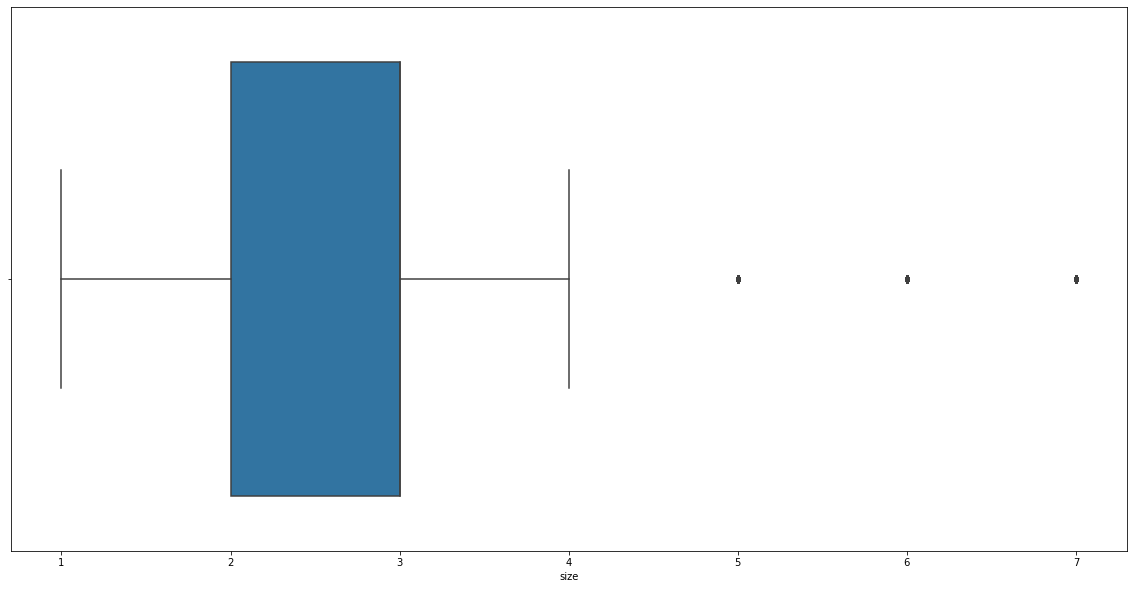

In [97]:
boxxplot('size')

In [98]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13134 entries, 0 to 13133
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13134 non-null  int64  
 1   size        13134 non-null  int32  
 2   total_sqft  13134 non-null  float64
 3   bath        13134 non-null  int32  
 4   price       13134 non-null  float64
dtypes: float64(2), int32(2), int64(1)
memory usage: 513.0 KB


### 3. total_sqft

In [121]:
def iqr_test(col):
    
    q1 = df1[col].quantile(0.25)
    q2 = df1[col].quantile(0.50)
    q3 = df1[col].quantile(0.75)
    global values,index, upper_tail, lower_tail
    iqr = q3 - q1
    
    print(f"IQR Value of {col} column      :- {iqr}")
    
    upper_tail = 3500
    lower_tail = 250
    maxx = df1[col].max()
    minn = df1[col].min()
    
    print(f"\nUpper Tail of {col} column     :- {upper_tail}")
    print(f"Maximum Value of {col} column  :- {maxx}")
          
    print(f"\nLower Tail of {col} column     :- {lower_tail}")
    print(f"Minimum Value of {col} column  :- {minn}")
    
    index1 = np.where(upper_tail < df1[col])
    index2 = np.where(lower_tail > df1[col])

    index = np.concatenate(((index1[0]),(index2[0])))
    countt = index.shape
    
    print(f"\nTotal Outliers in {col} column :- {countt[0]}")
       
    values = df1[col].iloc[index]
    print(f"\nIndex   Value:-\n{values}")

In [118]:
iqr_test('total_sqft')

IQR Value of total_sqft column      :- 570.0

Upper Tail of total_sqft column     :- 3500
Maximum Value of total_sqft column  :- 52272.0

Lower Tail of total_sqft column     :- 245.0
Minimum Value of total_sqft column  :- 250.0

Total Outliers in total_sqft column :- 505

Index   Value:-
59       4395.0
61       5700.0
76       4400.0
111      3700.0
119      5611.5
          ...  
12987    8000.0
12995    4000.0
13075    4050.0
13101    3600.0
13103    4689.0
Name: total_sqft, Length: 505, dtype: float64


In [115]:
lower_index = np.where(df1['total_sqft'] < lower_tail)[0]
lower_index

array([  344,   405,  1004,  1005,  1068,  1102,  1714,  4029,  4056,
        4896,  5370,  5545,  5582,  5880,  5886,  6209,  6239,  6844,
        7217,  7489,  7606,  9284,  9593, 10339, 10342, 11391, 11445,
       12078, 12383], dtype=int64)

In [116]:
df1.drop(lower_index, inplace=True)
df1.index = np.arange(0,len(df1))
df1

,location,size,total_sqft,bath,price
0,14,2,1056.0,2,39.07
1,162,4,2600.0,5,120.00
2,6,3,1440.0,2,62.00
3,131,3,1521.0,3,95.00
4,36,2,1200.0,2,51.00
...,...,...,...,...,...
13100,0,5,3453.0,4,231.00
13101,310,4,3600.0,5,400.00
13102,9,2,1141.0,2,60.00
13103,104,4,4689.0,4,488.00


In [119]:
df1.drop(index, inplace=True)
df1.index = np.arange(0,len(df1))
df1

,location,size,total_sqft,bath,price
0,14,2,1056.0,2,39.07
1,162,4,2600.0,5,120.00
2,6,3,1440.0,2,62.00
3,131,3,1521.0,3,95.00
4,36,2,1200.0,2,51.00
...,...,...,...,...,...
12595,6,3,1345.0,2,57.00
12596,79,3,1715.0,3,112.00
12597,0,5,3453.0,4,231.00
12598,9,2,1141.0,2,60.00


In [122]:
iqr_test('total_sqft')

IQR Value of total_sqft column      :- 507.25

Upper Tail of total_sqft column     :- 3500
Maximum Value of total_sqft column  :- 3500.0

Lower Tail of total_sqft column     :- 250
Minimum Value of total_sqft column  :- 250.0

Total Outliers in total_sqft column :- 0

Index   Value:-
Series([], Name: total_sqft, dtype: float64)


### 4. bath

In [123]:
df1['bath']

0        2
1        5
2        2
3        3
4        2
        ..
12595    2
12596    3
12597    4
12598    2
12599    1
Name: bath, Length: 12600, dtype: int32

In [127]:
def iqr_test(col):
    
    q1 = df1[col].quantile(0.25)
    q2 = df1[col].quantile(0.50)
    q3 = df1[col].quantile(0.75)
    global values,index, upper_tail, lower_tail
    iqr = q3 - q1
    
    print(f"IQR Value of {col} column      :- {iqr}")
    
    upper_tail = q1 - 1.5*iqr
    lower_tail = q3 + 1.5*iqr
    maxx = df1[col].max()
    minn = df1[col].min()
    
    print(f"\nUpper Tail of {col} column     :- {upper_tail}")
    print(f"Maximum Value of {col} column  :- {maxx}")
          
    print(f"\nLower Tail of {col} column     :- {lower_tail}")
    print(f"Minimum Value of {col} column  :- {minn}")
    
    index1 = np.where(upper_tail < df1[col])
    index2 = np.where(lower_tail > df1[col])

    index = np.concatenate(((index1[0]),(index2[0])))
    countt = index.shape
    
    print(f"\nTotal Outliers in {col} column :- {countt[0]}")
       
    values = df1[col].iloc[index]
    print(f"\nIndex   Value:-\n{values}")

In [128]:
iqr_test('bath')

IQR Value of bath column      :- 1.0

Upper Tail of bath column     :- 0.5
Maximum Value of bath column  :- 9

Lower Tail of bath column     :- 4.5
Minimum Value of bath column  :- 1

Total Outliers in bath column :- 24559

Index   Value:-
0        2
1        5
2        2
3        3
4        2
        ..
12595    2
12596    3
12597    4
12598    2
12599    1
Name: bath, Length: 24559, dtype: int32


# train_test_split

In [154]:
x = df1.drop('price', axis =1)
y = df1['price']

In [155]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.99, random_state=20)

In [156]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [157]:
lin_reg = LinearRegression()
knn_reg = KNeighborsRegressor()
dt_reg = DecisionTreeRegressor()

def model_pred():
    model = [lin_reg, knn_reg, dt_reg]
    for i in model:
        print(i.fit(x_train,y_train))

        #evaluate 
        y_pred_train = i.predict(x_train)

        pred_xtrain = r2_score(y_train, y_pred_train)
        print(f"Training Accuracy for {i} Model :-", round(pred_xtrain,3))

        y_pred_test = i.predict(x_test)

        pred_xtest = r2_score(y_test, y_pred_test)
        print(f"Testing Accuracy for {i} Model :-", round(pred_xtest,3))

        print("*"*50)

model_pred()

LinearRegression()
Training Accuracy for LinearRegression() Model :- 0.461
Testing Accuracy for LinearRegression() Model :- 0.411
**************************************************
KNeighborsRegressor()
Training Accuracy for KNeighborsRegressor() Model :- 0.635
Testing Accuracy for KNeighborsRegressor() Model :- 0.352
**************************************************
DecisionTreeRegressor()
Training Accuracy for DecisionTreeRegressor() Model :- 0.988
Testing Accuracy for DecisionTreeRegressor() Model :- 0.262
**************************************************


In [ ]:
def Knn_model(array):
    location = 520